In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib
import calendar
from imblearn.over_sampling import SMOTE


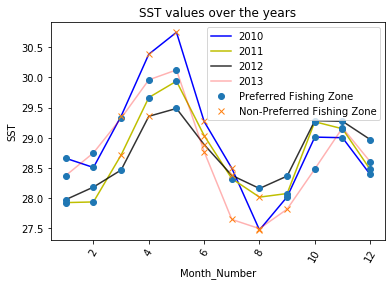

In [16]:
dataset = pd.read_csv('fish.csv')
dataset = dataset.dropna()
dataset = dataset[['Year', 'Month', 'SST', 'SSC', 'AT', 'RH', 'SLP', 'TC', 'TOTALOIL', 'Label']]

dataset.head()

# Plot all the data as lines
do=dataset.loc[dataset.Label =='PFZ'] 

dx=dataset.loc[dataset.Label =='NPFZ'] 

df=dataset.loc[dataset.Year ==2010] 
plt.plot(df['Month'], df['SST'], 'b-', label  = '2010', alpha = 1.0)
df=dataset.loc[dataset.Year ==2011] 
plt.plot(df['Month'], df['SST'], 'y-', label  = '2011', alpha = 1.0)
df=dataset.loc[dataset.Year ==2012] 
plt.plot(df['Month'], df['SST'], 'k-', label  = '2012', alpha = 0.8)
df=dataset.loc[dataset.Year ==2013] 
plt.plot(df['Month'], df['SST'], 'r-', label  = '2013', alpha = 0.3)
plt.plot(do['Month'], do['SST'], 'o',
             label="Preferred Fishing Zone")
plt.plot(dx['Month'], dx['SST'], 'x',
             label="Non-Preferred Fishing Zone")
plt.legend(); plt.xticks(rotation = '60');
plt.xlabel('Month_Number'); plt.ylabel('SST'); plt.title('SST values over the years');


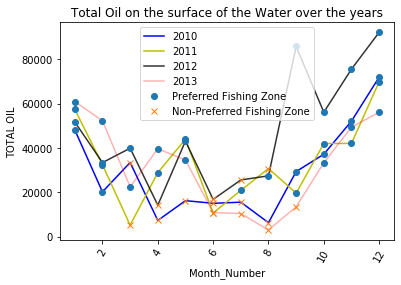

In [29]:
df=dataset.loc[dataset.Year ==2010] 
plt.plot(df['Month'], df['TOTALOIL'], 'b-', label  = '2010', alpha = 1.0)
df=dataset.loc[dataset.Year ==2011] 
plt.plot(df['Month'], df['TOTALOIL'], 'y-', label  = '2011', alpha = 1.0)
df=dataset.loc[dataset.Year ==2012] 
plt.plot(df['Month'], df['TOTALOIL'], 'k-', label  = '2012', alpha = 0.8)
df=dataset.loc[dataset.Year ==2013] 
plt.plot(df['Month'], df['TOTALOIL'], 'r-', label  = '2013', alpha = 0.3)
plt.plot(do['Month'], do['TOTALOIL'], 'o',
             label="Preferred Fishing Zone")
plt.plot(dx['Month'], dx['TOTALOIL'], 'x',
             label="Non-Preferred Fishing Zone")
plt.legend(); plt.xticks(rotation = '60');
plt.xlabel('Month_Number'); plt.ylabel('TOTAL OIL'); plt.title('Total Oil on the surface of the Water over the years');

In [17]:
#Converting the Label col to integer - 0 or 1 
#Normalization
dataset.loc[dataset.Label =="PFZ", 'Label'] = 1  
dataset.loc[dataset.Label =="NPFZ", 'Label'] = 0  
dataset.head()
dataset.describe()


,Year,Month,SST,SSC,AT,RH,SLP,TC,TOTALOIL,Label
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2011.500000,6.500000,28.773322,0.191667,28.175493,78.597505,1010.042029,4.373617,35478.150125,0.666667
std,1.129865,3.488583,0.746084,0.041067,0.771510,3.546057,1.541045,1.233051,21824.304852,0.476393
min,2010.000000,1.000000,27.470444,0.110000,26.987391,72.123404,1007.252708,2.683333,2968.551000,0.000000
25%,2010.750000,3.750000,28.286822,0.160000,27.541643,75.819739,1009.005887,3.298566,16621.301000,0.000000
50%,2011.500000,6.500000,28.686706,0.190000,28.054825,77.900111,1010.030624,4.267319,33315.149000,1.000000
75%,2012.250000,9.250000,29.270661,0.222500,28.535065,81.734589,1011.166692,5.571208,49967.327000,1.000000
max,2013.000000,12.000000,30.749362,0.260000,30.292000,85.946667,1013.454318,6.606122,92154.675000,1.000000


In [18]:
#Splitting of dataset
X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

split = int(len(dataset)*0.6)
X_train, X_test, y_train, y_tests = X[:split], X[split:], y[:split], y[split:]

#Up-sampling
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

#checking the shapes of the data 
print('Training data :', X_train_res.shape)
print('Training label:', y_train_res.shape)
print('Test data:', X_test.shape)
print('Test label:', y_tests.shape)
#Effect of upsampling
print (np.bincount(y_train))
print (np.bincount(y_train_res))

Training data : (36, 8)
Training label: (36,)
Test data: (20, 8)
Test label: (20,)
[10 18]
[18 18]


In [19]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 40)
# Train the model on training data
rf.fit(X_train_res, y_train_res);

In [24]:
# Use the forest's predict method on the test data
predictions = (rf.predict(X_test))
predictions =np.round (predictions)
# Calculate the absolute errors
errors = abs(predictions - y_tests)
# Print out the mean absolute error (mae) and accyrecy
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print (100-( errors.sum()/y_tests.sum()*100)  ,"%" )



Mean Absolute Error: 0.1 degrees.
85.71428571428572 %


Confusion matrix:
 [[ 6  0]
 [ 2 12]]


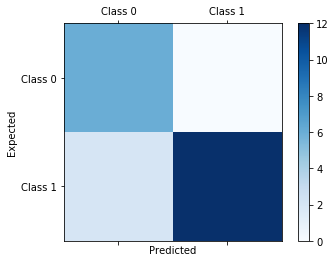

In [21]:
#For confussion matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_tests, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [22]:
#Most Important feature is calculated out
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 
                                    ascending=False)
display (feature_importances)

,importance
TOTALOIL,0.612611
TC,0.092280
Month,0.090393
AT,0.062841
RH,0.050135
SST,0.047551
SLP,0.023734
SSC,0.020455
